# Интерполирование функций

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain
import math

%matplotlib inline

In [2]:
def cummul(X):
    """cumulative multiply"""
    res = 1
    for x in X:
        res *= x
    return res

In [7]:
def interpolize_func(Xs, Ys):
    
    def f(X):
        s = 0
        
        for k in range(len(Xs)):
            xk, yk = Xs[k], Ys[k]
            lk = cummul([(X - Xs[i]) / (xk - Xs[i]) for i in range(len(Xs)) if i != k])
            s += yk * lk
        
        return s
    
    return np.vectorize(f)

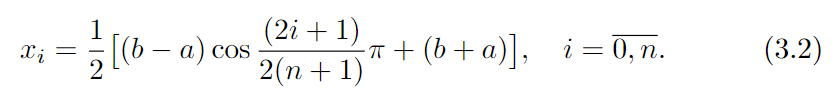

In [75]:
# реализация получения n точек по формуле 3.2

def get_X(a, b, n):
    X = [0] * n
    
    for i in range(n):
        phi = math.pi * (2*i + 1) / (2*(n+1))
        X[i] = 1/2 * ((b-a) * math.cos(phi) + (b+a))
    
    return X

In [71]:
def pipeline(f, X, ax):
    f_interpol = interpolize_func(X, f(X))
    
    X_range = np.linspace(-0.99, 10, 100)
    ax.plot(X_range, f(X_range), label='y = f(x)')
    ax.plot(X_range, f_interpol(X_range), label='Lagrange poly')
    ax.legend()
    ax.title.set_text(f'Кол-во точек: {pc}')

## Интерполирование функции $ f(x) = x  \ln{x} $

In [5]:
def f(x):
    return x * np.log(x + 1)

f = np.vectorize(f)

### Интерполирование по равноостоящим точкам

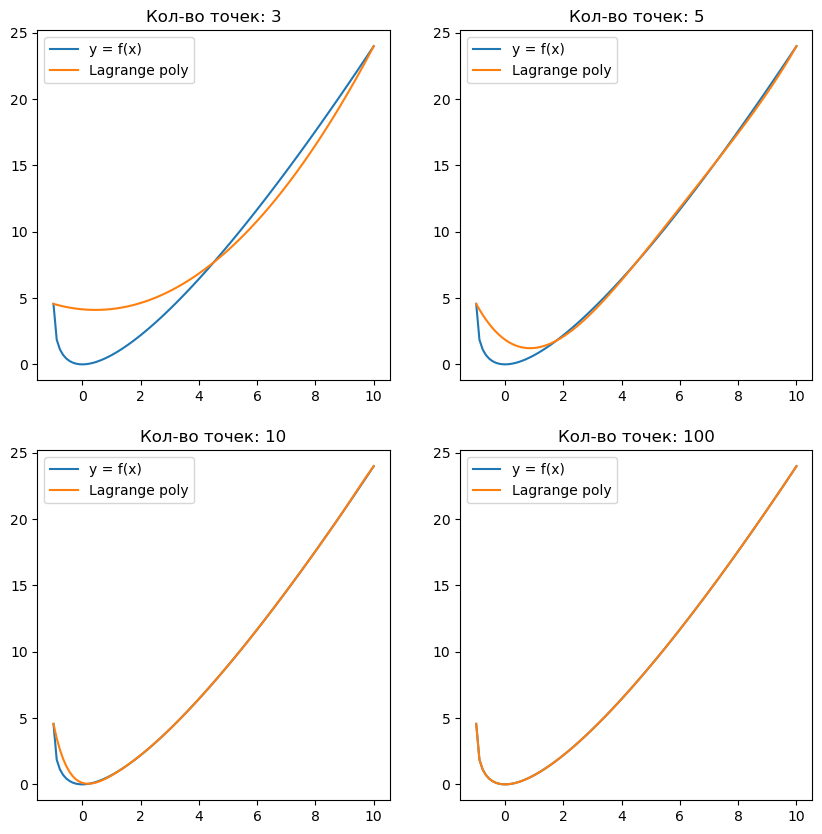

In [72]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs_flatten = list(chain.from_iterable(axs))
point_counts = [3, 5, 10, 100]

for ax, pc in zip(axs_flatten, point_counts):
    X = np.linspace(-0.99, 10, pc)
    pipeline(f, X, ax)

### Интерполирование по точкам, полученных по формуле (3.2)

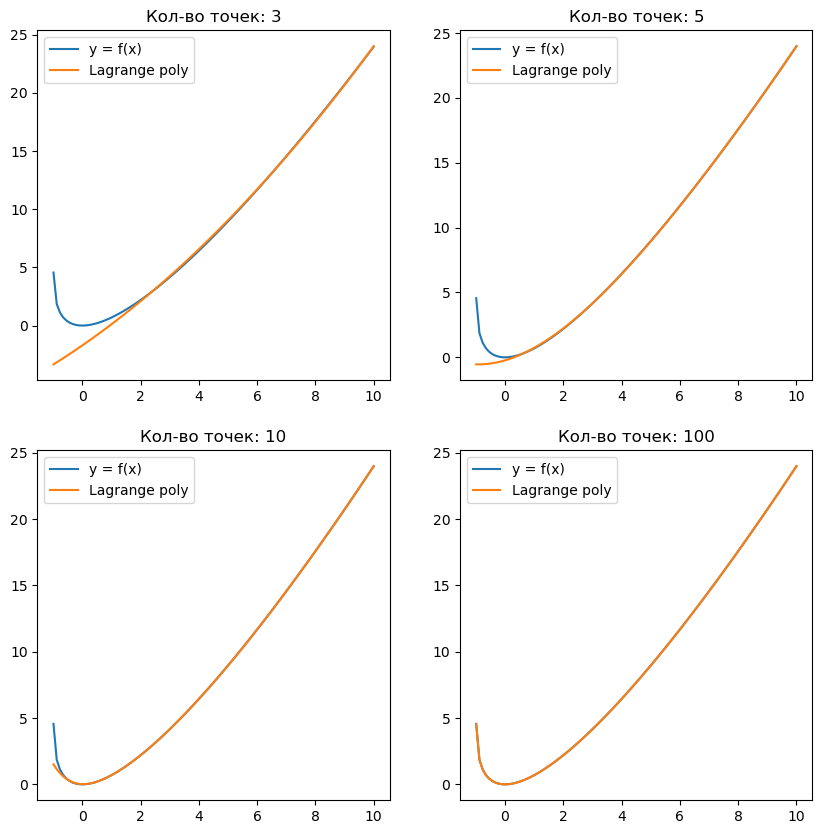

In [73]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs_flatten = list(chain.from_iterable(axs))
point_counts = [3, 5, 10, 100]

for ax, pc in zip(axs_flatten, point_counts):
    X = get_X(-0.99, 10, pc)
    pipeline(f, X, ax)

## Интерполирование функции $ h(x) = |x|  f(x) $

In [64]:
def h(x):
    return math.abs(x) * x * np.log(x + 1)

h = np.vectorize(f)

### Интерполирование по равноостоящим точкам

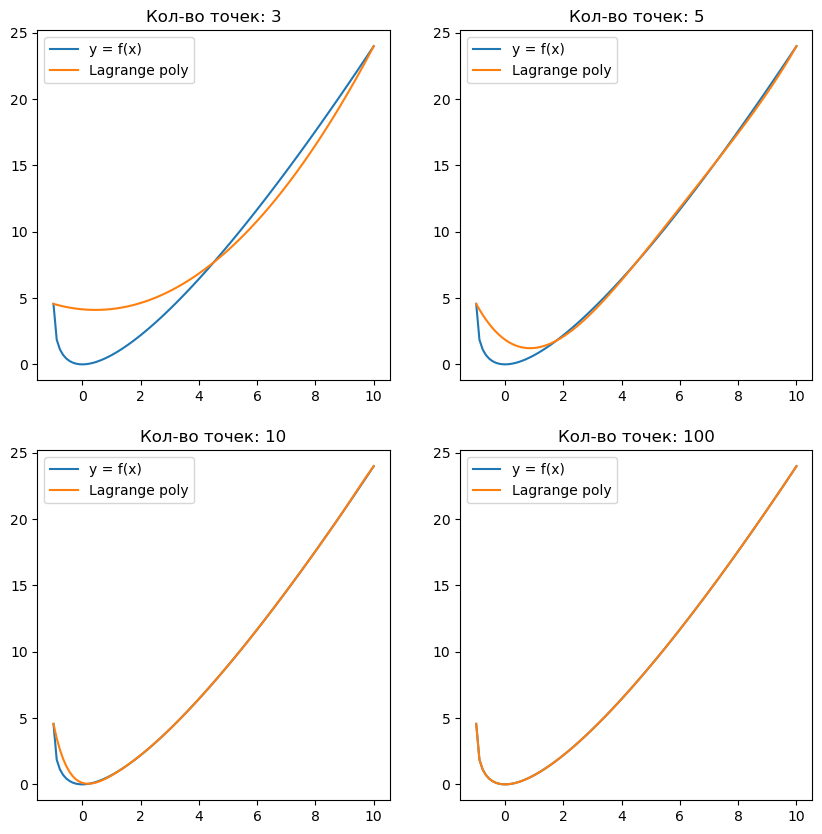

In [74]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs_flatten = list(chain.from_iterable(axs))
point_counts = [3, 5, 10, 100]

for ax, pc in zip(axs_flatten, point_counts):
    X = np.linspace(-0.99, 10, pc)
    pipeline(h, X, ax)

### Интерполирование по точкам, полученных по формуле (3.2)

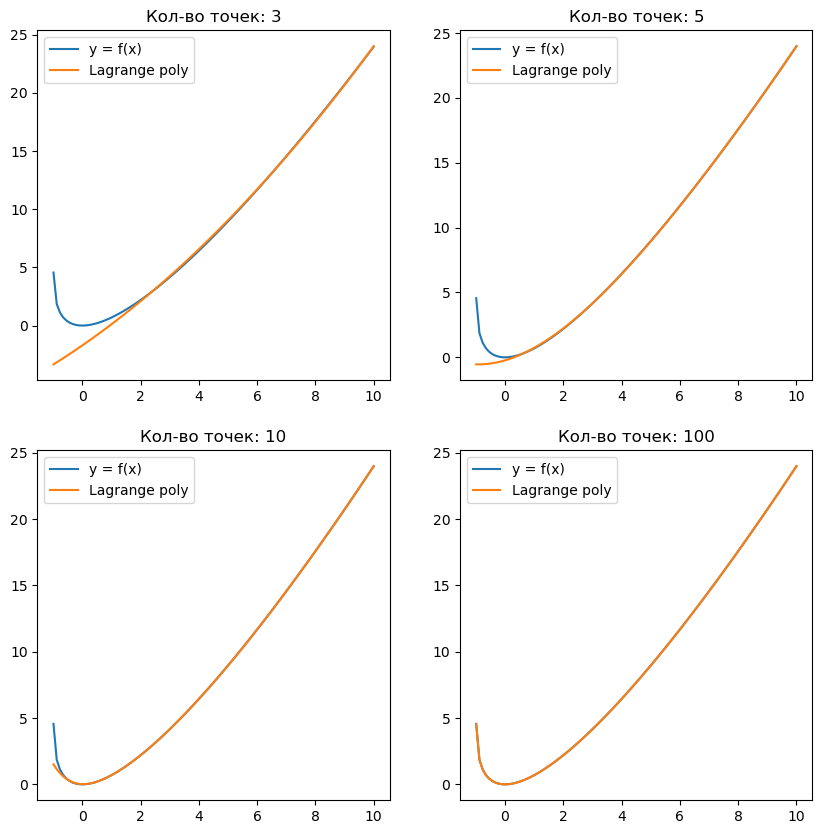

In [77]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs_flatten = list(chain.from_iterable(axs))
point_counts = [3, 5, 10, 100]

for ax, pc in zip(axs_flatten, point_counts):
    X = get_X(-0.99, 10, pc)
    pipeline(h, X, ax)